Data is availabe at : https://archive.ics.uci.edu/ml/datasets/BitcoinHeistRansomwareAddressDataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Loading the data**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Bitcoinheist/BitcoinHeistData.csv')
df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [ ]:
df.shape

(2916697, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


## **Finding Nan values**

In [ ]:
df.isnull().sum()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

There are non Nan values in any of the attributes.

In [ ]:
df.label.value_counts()

white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw              

In [ ]:
df.label.value_counts(normalize=True)*100

white                          98.580140
paduaCryptoWall                 0.424796
montrealCryptoLocker            0.319368
princetonCerber                 0.316214
princetonLocky                  0.227140
montrealCryptXXX                0.082936
montrealNoobCrypt               0.016560
montrealDMALockerv3             0.012137
montrealDMALocker               0.008606
montrealSamSam                  0.002126
montrealCryptoTorLocker2015     0.001886
montrealGlobeImposter           0.001886
montrealGlobev3                 0.001166
montrealGlobe                   0.001097
montrealWannaCry                0.000960
montrealRazy                    0.000446
montrealAPT                     0.000377
paduaKeRanger                   0.000343
montrealFlyper                  0.000309
montrealXTPLocker               0.000274
montrealXLockerv5.0             0.000240
montrealVenusLocker             0.000240
montrealCryptConsole            0.000240
montrealEDA2                    0.000206
montrealJigSaw  

## **Selecting the numerical features**

In [ ]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
df_X=df[numerical_cols]
df_Y=df['label']
#numerical_cols

# **Custom designed train-test split function**

Splitting the data into training, validation and testing set (70:15:15)</br>
For customisation, the original indices have been shuffled randomly using seed value=0 and then training, test and validation data has been obtained.
</br>


In [ ]:
def train_test_split(dframe_X,dframe_Y,size,random_state=0):

  np.random.seed(random_state) # seed value=0
  
  indices = [i for i in range(len(dframe_X))]
  np.random.shuffle(indices)
  #print(indices)
  num_training_indices=int(len(dframe_X)* (1-size))
  #print(num_training_indices)
  train_indices = indices[:num_training_indices]
  test_indices = indices[num_training_indices:]
  X_data_train, X_data_test = dframe_X.iloc[train_indices], dframe_X.iloc[test_indices]
  Y_data_train, Y_data_test = dframe_Y.iloc[train_indices], dframe_Y.iloc[test_indices]
  
  return X_data_train,X_data_test,Y_data_train,Y_data_test



In [ ]:
X_,X_test,Y_,Y_test=train_test_split(df_X,df_Y,size=0.15)
X_train,X_val,Y_train,Y_val=train_test_split(X_,Y_,size=0.15)

To illustrate that the randomized split is a good representative of the original data, the percentage distribution of the different class labels in the shuffled data has been calculated as follows

In [ ]:
ser1=df_Y.value_counts(normalize=True)*100
repr=pd.DataFrame(ser1,)
repr.rename(columns = {'label':'Initial comp %'}, inplace = True)
repr['Train %']=Y_train.value_counts(normalize=True)*100
repr['Test %']=Y_test.value_counts(normalize=True)*100
repr['Val %']=Y_val.value_counts(normalize=True)*100
repr['Initial comp']=df_Y.value_counts()
repr['Train']=Y_train.value_counts()
repr['Test']=Y_test.value_counts()
repr['Val']=Y_val.value_counts()


repr

,Initial comp %,Train %,Test %,Val %,Initial comp,Train,Test,Val
white,98.580140,98.581132,98.579902,98.574805,2875284,2077413,431292.0,366579.0
paduaCryptoWall,0.424796,0.427511,0.412110,0.424332,12390,9009,1803.0,1578.0
montrealCryptoLocker,0.319368,0.317086,0.322053,0.329139,9315,6682,1409.0,1224.0
princetonCerber,0.316214,0.315900,0.314968,0.319459,9223,6657,1378.0,1188.0
princetonLocky,0.227140,0.226924,0.229940,0.225073,6625,4782,1006.0,837.0
montrealCryptXXX,0.082936,0.081953,0.090742,0.079327,2419,1727,397.0,295.0
montrealNoobCrypt,0.016560,0.016561,0.017371,0.015596,483,349,76.0,58.0
montrealDMALockerv3,0.012137,0.011579,0.012800,0.014521,354,244,56.0,54.0
montrealDMALocker,0.008606,0.009016,0.008000,0.006992,251,190,35.0,26.0
montrealSamSam,0.002126,0.002041,0.002057,0.002689,62,43,9.0,10.0


The distribution  of class labels in train and test set is nearly same as original distribution. This can be verified from the above dataframe

## **Training the decision tree using both 'gini' and 'entropy' and changing the max_depth as [4,8,10,15,20]**


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth=[4,8,10,15,20]
criterion=['gini', 'entropy']
acc_scores_test={}
acc_scores_test['gini']=[]
acc_scores_test['entropy']=[]
d_models=[]
for depth in max_depth:
  for criteria in criterion:
    mod_name='d_model'+str(depth)+criteria

    mod_name=DecisionTreeClassifier(max_depth=depth,criterion=criteria)
    mod_name.fit(X_train,Y_train)
    d_models.append(mod_name)
    Y_pred=mod_name.predict(X_test)
    score=accuracy_score(Y_test,Y_pred)
    acc_scores_test[criteria].append((score,depth))
    print(f'Finished for depth: {depth} and critera:{criteria}')
    

Finished for depth: 4 and critera:gini
Finished for depth: 4 and critera:entropy
Finished for depth: 8 and critera:gini
Finished for depth: 8 and critera:entropy
Finished for depth: 10 and critera:gini
Finished for depth: 10 and critera:entropy
Finished for depth: 15 and critera:gini
Finished for depth: 15 and critera:entropy
Finished for depth: 20 and critera:gini
Finished for depth: 20 and critera:entropy


In [ ]:
acc_scores_test

{'gini': [(0.9857990194397779, 4),
  (0.9864070124912858, 8),
  (0.9869921486611581, 10),
  (0.988114421549468, 15),
  (0.9867407229631662, 20)],
 'entropy': [(0.9857990194397779, 4),
  (0.9860893018365504, 8),
  (0.9872778596816036, 10),
  (0.9882104204523376, 15),
  (0.9863247277173975, 20)]}

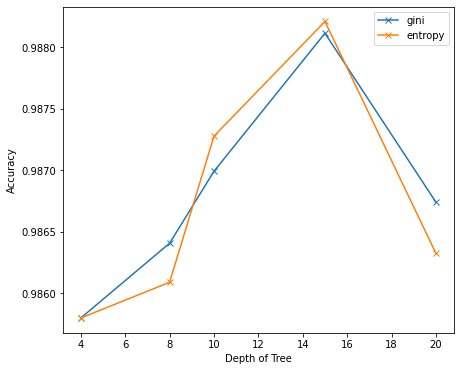

In [ ]:
plt.figure(figsize=(7,6))
for criteria in acc_scores_test:
  max_depth=[]
  accuracy=[]
  for acc, depth in acc_scores_test[criteria]:
    accuracy.append(acc)
    max_depth.append(depth)
  plt.plot(max_depth,accuracy,marker='x',label=f'{criteria}')
  plt.xlabel('Depth of Tree')
  plt.ylabel('Accuracy')
  plt.legend()

plt.show()


* The criteria for the best accuracy on the test set is 'entropy' and depth=15. 
*   Best accuracy is reported as 98.882%.
* The percentage of records belonging to the dominant class(label='white') is 98.57%. Hence the baseline accuracy can be fixed as 98.57%. 
* The best decision tree achieves the accuracy of 98.882%  , thus beating the baseline accuracy(98.57%)



## **Additionally the decision tree accuracy has also been found on the validation set as shown below**

In [ ]:
max_depth=[4,8,10,15,20]
criterion=['gini', 'entropy']


acc_scores_val={}
acc_scores_val['gini']=[]
acc_scores_val['entropy']=[]

d_models=np.array(d_models)
d_models=d_models.reshape((5,2))

for i in range(len(max_depth)):
  for j in range(len(criterion)):
    ypred_val=d_models[i][j].predict(X_val)
    score=accuracy_score(Y_val,ypred_val)
    acc_scores_val[criterion[j]].append((score,max_depth[i]))
    print(f'Finished for depth: {max_depth[i]} and critera:{criterion[j]}')
    





Finished for depth: 4 and critera:gini
Finished for depth: 4 and critera:entropy
Finished for depth: 8 and critera:gini
Finished for depth: 8 and critera:entropy
Finished for depth: 10 and critera:gini
Finished for depth: 10 and critera:entropy
Finished for depth: 15 and critera:gini
Finished for depth: 15 and critera:entropy
Finished for depth: 20 and critera:gini
Finished for depth: 20 and critera:entropy


In [ ]:
acc_scores_val

{'gini': [(0.9857480524579232, 4),
  (0.9864041798541999, 8),
  (0.9869661906157648, 10),
  (0.9878078622347591, 15),
  (0.9866730845248051, 20)],
 'entropy': [(0.9857480524579232, 4),
  (0.9860895613895918, 8),
  (0.987286187173785, 10),
  (0.9878159293748773, 15),
  (0.985944352867465, 20)]}

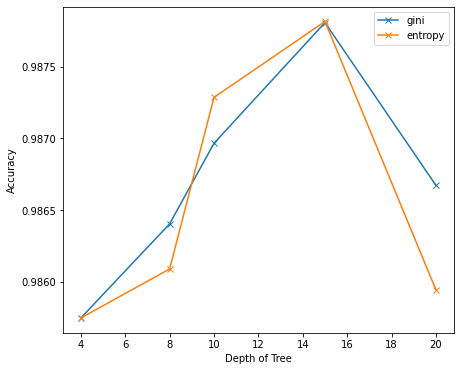

In [ ]:
plt.figure(figsize=(7,6))
for criteria in acc_scores_test:
  max_depth=[]
  accuracy=[]
  for acc, depth in acc_scores_val[criteria]:
    accuracy.append(acc)
    max_depth.append(depth)
  plt.plot(max_depth,accuracy,marker='x',label=f'{criteria}')
  plt.xlabel('Depth of Tree')
  plt.ylabel('Accuracy')
  plt.legend()

plt.show()

* The best accuracy is still getting obtained with the same criteria for the decison tree i.e. 'entropy' and depth=15 as visible from the graph above.
*   The best accuracy on validation set is  reported as 98.78% which is almost equal to that on test set.




# **Creating the Ensemble Model**
* Creating 100 different decision stumps with max_depth=3.
* Out of the training data each time a different 50% random sample of the training set has been drawn using different seeds, for each of the 100 decision stumps.
* The ensemble assumes 100 different decision stumps in it. 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# 9 min

y_pred_100=np.zeros((100,X_test.shape[0]),dtype='object')
# defining y_pred_100 to store the predicted class labels for 100 different decision stumps

for i in range(100):
  np.random.seed(i) # selecting the seed from range [0,99]
  indices=[i for i in range(len(X_train))]
  random_indices=np.random.choice(indices,len(X_train)//2,replace=False)
  X_stump=X_train.iloc[random_indices]
  Y_stump=Y_train.iloc[random_indices]

  d_model=DecisionTreeClassifier(max_depth=3)
  d_model.fit(X_stump,Y_stump)

  y_pred=d_model.predict(X_test)
  y_pred_100[i]=y_pred
  print(f'Finished Decsion stump: {i+1}')



Finished Decsion stump: 1
Finished Decsion stump: 2
Finished Decsion stump: 3
Finished Decsion stump: 4
Finished Decsion stump: 5
Finished Decsion stump: 6
Finished Decsion stump: 7
Finished Decsion stump: 8
Finished Decsion stump: 9
Finished Decsion stump: 10
Finished Decsion stump: 11
Finished Decsion stump: 12
Finished Decsion stump: 13
Finished Decsion stump: 14
Finished Decsion stump: 15
Finished Decsion stump: 16
Finished Decsion stump: 17
Finished Decsion stump: 18
Finished Decsion stump: 19
Finished Decsion stump: 20
Finished Decsion stump: 21
Finished Decsion stump: 22
Finished Decsion stump: 23
Finished Decsion stump: 24
Finished Decsion stump: 25
Finished Decsion stump: 26
Finished Decsion stump: 27
Finished Decsion stump: 28
Finished Decsion stump: 29
Finished Decsion stump: 30
Finished Decsion stump: 31
Finished Decsion stump: 32
Finished Decsion stump: 33
Finished Decsion stump: 34
Finished Decsion stump: 35
Finished Decsion stump: 36
Finished Decsion stump: 37
Finished D

In [ ]:
y_pred_100.shape

(100, 437505)

Finding out the majority vote for the predicted class labels from the 100 decision stumps

In [ ]:
y_pred_final= np.zeros((X_test.shape[0],1),dtype='object')
y_pred_100= y_pred_100.T
for i in range(X_test.shape[0]):
  dstump1=y_pred_100[i].tolist()
  y_pred_final[i]=max(set(dstump1), key=lambda x: dstump1.count(x))


Class labels for the original test data

In [ ]:
Y_test.value_counts(normalize=True)*100

white                          98.574805
paduaCryptoWall                 0.424332
montrealCryptoLocker            0.329139
princetonCerber                 0.319459
princetonLocky                  0.225073
montrealCryptXXX                0.079327
montrealNoobCrypt               0.015596
montrealDMALockerv3             0.014521
montrealDMALocker               0.006992
montrealSamSam                  0.002689
montrealGlobeImposter           0.002420
montrealCryptoTorLocker2015     0.001345
montrealGlobe                   0.001345
montrealGlobev3                 0.000538
montrealRazy                    0.000538
montrealAPT                     0.000269
montrealCryptConsole            0.000269
montrealJigSaw                  0.000269
montrealFlyper                  0.000269
montrealXLockerv5.0             0.000269
paduaKeRanger                   0.000269
montrealEDA2                    0.000269
Name: label, dtype: float64

Class labels for the prediction on 100 different decsion stumps

In [ ]:
y_pred_final_series=pd.Series(y_pred_final.reshape(-1))
y_pred_final_series.value_counts(normalize=True)*100

white    100.0
dtype: float64

There is only one class label(white) predicted by the 100 different decision tree stump based ensemble.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred_final,Y_test)

0.9857990194397779



*   The accuracy of ensemble method is same as the baseline accuracy i.e 98.57%.
*   Thus there is no improvement in accuracy using the ensemble method and it performs worse than Decision Tree classifier.
* The possible reason could be the restricted per decision stump depth of value 3.


# **Using Adaboost and making comparsions**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


estimators=[4,8,10,15,20]
dt=DecisionTreeClassifier(criterion='entropy',max_depth=15)
accuracy_ADB=[]
for estimator in estimators: #takes 43 mins
  clf = AdaBoostClassifier(n_estimators=estimator, base_estimator=dt,random_state=0)
  clf.fit(X_train,Y_train)
  y_pred=clf.predict(X_test)
  score=accuracy_score(y_pred,Y_test)
  accuracy_ADB.append(score)
  print(f'Finished for estimator: {estimator}')

Finished for estimator: 4
Finished for estimator: 8
Finished for estimator: 10
Finished for estimator: 15
Finished for estimator: 20


Accuracy for Adaboost

In [ ]:
accuracy_ADB

[0.9878195677763683,
 0.9860527308259334,
 0.985069884915601,
 0.9844116067244946,
 0.985751019988343]

## **Creating Random Forest for comparsion**

In [ ]:
accuracy_RF=[] #8 mins+
estimators=[4,8,10,15,20]
for estimator in estimators:
  d_model=RandomForestClassifier(n_estimators=estimator,max_depth=15,criterion='entropy') 
  d_model.fit(X_train,Y_train)
  y_pred=d_model.predict(X_test)
  score=accuracy_score(Y_test,y_pred)
  accuracy_RF.append(score)
  print(f'Finished for estimator: {estimator}')




Finished for estimator: 4
Finished for estimator: 8
Finished for estimator: 10
Finished for estimator: 15
Finished for estimator: 20


Accuracy for Random forest

In [ ]:
accuracy_RF 

[0.986752151403984,
 0.9866812950709135,
 0.9867110090170398,
 0.9865852961680438,
 0.986589867544371]

Graph illustrating accuracy of Adaboost and Random Forest for different number of estimators

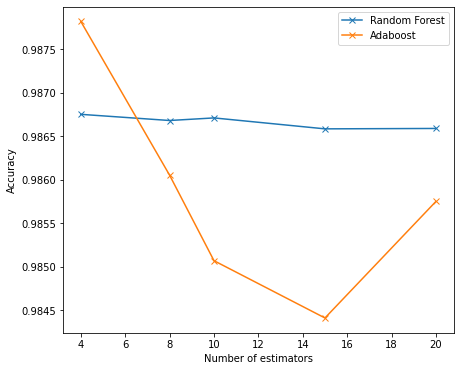

In [ ]:
plt.figure(figsize=(7,6))
plt.plot(estimators,accuracy_RF, label='Random Forest',marker='x')
plt.plot(estimators,accuracy_ADB, label='Adaboost',marker='x')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



*   Adaboost achieves highest accuracy of 98.78% for n_estimators=4, but accuracy keeps dropping for the rest of the values of n_estimators.
* Random forest shows similar accuracy=98.67% for all the different number of estimators.
* Comparison of accuracy for Decision Tree, Adaboost and Random Forest
* Best accuracy=98.88% is obtained using Decision Tree.
* Second best accuracy=98.78% is of Adaboost.
* The accuracy=98.67% of random forest is next.
* The 100 decision stumps based ensemble model has accuracy of 98.57%.
* The class imbalance in the data maybe a possible reason for the underperformance of Random Forest, Adaboost and ensemble.

